# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch

In [2]:
device=torch.device('cuda:0')

In [3]:
dataset = DataLoader(data_dir="../DDICorpus/DDICorpus/", device=device)

processing data
reading in data...
data read
                sentence_id                      token_id char_start_id  \
1      DDI-DrugBank.d644.s0                cholestyramine           142   
2      DDI-DrugBank.d644.s2                      Rifampin            62   
3      DDI-DrugBank.d644.s2                  barbiturates            71   
4      DDI-DrugBank.d644.s2                     phenytoin            84   
5      DDI-DrugBank.d644.s2                      Dilantin            95   
...                     ...                           ...           ...   
15438   DDI-MedLine.d113.s3                benzodiazepine           118   
15439   DDI-MedLine.d113.s3                       ethanol           138   
15440   DDI-MedLine.d113.s5                       alcohol           111   
15441   DDI-MedLine.d113.s5  3-hydroxy-1,4-benzodiazepine           123   
15442   DDI-MedLine.d113.s6                       ethanol            19   

      char_end_id  split  
1             155   test  


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d158.s17,423,121,131,train
1,DDI-DrugBank.d448.s5,940,52,66,val
2,DDI-DrugBank.d485.s22,3,97,105,train
3,DDI-DrugBank.d184.s0,2,525,536,val
4,DDI-DrugBank.d78.s8,64,79,90,train


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d514.s2,3,170,175
1,DDI-DrugBank.d143.s18,1,66,71
2,DDI-DrugBank.d455.s4,1,109,116
3,DDI-MedLine.d111.s10,1,38,50
4,DDI-DrugBank.d456.s2,1,38,47


In [6]:
dataset.vocab[:15]

['cholestyramine',
 'Rifampin',
 'barbiturates',
 'phenytoin',
 'Dilantin',
 'carbamazepine',
 'Tegretol',
 'Estrogens',
 'benzodiazepines',
 'lorezepam',
 'oxezepam',
 'temezepam',
 'antibiotics',
 'warfarin',
 'Infergen']

In [7]:
dataset.id2ner

{1: 'drug', 2: 'group', 3: 'brand', 4: 'drug_n'}

In [8]:
dataset.max_sample_length

50

In [9]:
dataset.get_random_sample()

/home/guspfame@GU.GU.SE/ML/A1/lt2316-h20-aa/aa/data_loading.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'DRUG:methotrexate'

### Data Exploration

[Counter({1: 7060, 2: 2573, 3: 1079, 4: 388}), Counter({1: 2342, 2: 844, 3: 349, 4: 115}), Counter({1: 328, 2: 131, 4: 89, 3: 52})]
{1: 'drug', 2: 'group', 3: 'brand', 4: 'drug_n'}


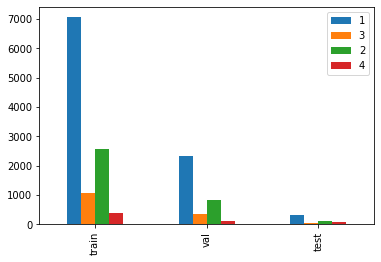

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
extract_features(data=dataset.data_df, max_sample_length=dataset.max_sample_length, id2word=dataset.id2word)

      split word_len  several_words  capital
1       val       14            0.0      0.0
3       val       11            0.0      0.0
8       val        8            0.0      0.0
9       val        7            0.0      1.0
17      val       12            0.0      1.0
...     ...      ...            ...      ...
15422   val        8            0.0      0.0
15433   val       25            1.0      0.0
15434   val        8            0.0      0.0
15438   val        6            0.0      1.0
15441   val        8            0.0      0.0

[3700 rows x 4 columns]


In [13]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2word=dataset.id2word
                                                        #Add any addtional arguments here
                                                       ))

      split word_len  several_words  capital
1       val       14            0.0      0.0
3       val       11            0.0      0.0
8       val        8            0.0      0.0
9       val        7            0.0      1.0
17      val       12            0.0      1.0
...     ...      ...            ...      ...
15422   val        8            0.0      0.0
15433   val       25            1.0      0.0
15434   val        8            0.0      0.0
15438   val        6            0.0      1.0
15441   val        8            0.0      0.0

[3700 rows x 4 columns]


TypeError: 'NoneType' object is not iterable

## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

In [ ]:
#dataset.plot_ner_per_sample_distribution()

In [ ]:
#dataset.plot_sample_length_distribution()

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()